<a href="https://colab.research.google.com/github/saurater/ciencia_de_dados/blob/main/An%C3%A1lise_Estat%C3%ADstica_Python_Gr%C3%A1ficos_Anova_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratório - IGTI - Ciência de Dados**
# Estatística com Python - Colab 
**Autora**: P. P

**Versão em Python:** Sam Faraday

**Data:** Maio de 2022



**Versão em R Disponível em -->** https://github.com/saurater/ciencia_de_dados/blob/main/Analise_Estat%C3%ADsticaR_Gr%C3%A1ficos_Anova_Regress%C3%A3o.ipynb

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from scipy.stats import shapiro, pearsonr

In [26]:
import statsmodels.api as sm

In [6]:
import statistics

In [9]:
from plotnine import ggplot, aes, geom_line, geom_density, xlim

In [27]:
# import seaborn library
import seaborn as sns

In [10]:
dados = {
  "Preco": [368.384514890573, 446.850186825816, 
          414.72765691978, 434.291090918223, 436.652686535348, 457.65797344255, 
          490.694346597566, 474.881781399868, 458.462395897205, 412.719412673294, 
          448.799032112411, 352.040747235864, 449.461858221104, 416.150953927119, 
          416.499426750268, 551.315803331779, 462.126789471159, 515.957335395508, 
          467.598697162974, 339.548470369391],
  "Porta": ["duas_portas", "quatro_portas", "duas_portas", "quatro_portas", "quatro_portas", 
          "duas_portas", "quatro_portas", "duas_portas", "quatro_portas", 
          "duas_portas", "quatro_portas", "quatro_portas", "duas_portas", 
          "quatro_portas", "duas_portas", "quatro_portas", "quatro_portas", 
          "duas_portas", "quatro_portas", "quatro_portas"],
  "Ar_Condicionado": ["sem_ar_condicionado",  "com_ar_condicionado", "com_ar_condicionado", "com_ar_condicionado", 
                  "com_ar_condicionado", "com_ar_condicionado", "com_ar_condicionado", 
                  "com_ar_condicionado", "com_ar_condicionado", "com_ar_condicionado", 
                  "com_ar_condicionado", "sem_ar_condicionado", "com_ar_condicionado", 
                  "com_ar_condicionado", "com_ar_condicionado", "com_ar_condicionado", 
                  "com_ar_condicionado", "com_ar_condicionado", "com_ar_condicionado", 
                  "sem_ar_condicionado"]  ,
   "Quadrimestre" : ["segundo_quadrimestre","segundo_quadrimestre", "segundo_quadrimestre", "segundo_quadrimestre", 
                 "segundo_quadrimestre", "terceiro_quadrimestre", "primeiro_quadrimestre", 
                 "primeiro_quadrimestre", "terceiro_quadrimestre", "segundo_quadrimestre", 
                 "terceiro_quadrimestre", "segundo_quadrimestre", "terceiro_quadrimestre", 
                 "segundo_quadrimestre", "segundo_quadrimestre", "primeiro_quadrimestre", 
                 "terceiro_quadrimestre", "primeiro_quadrimestre", "primeiro_quadrimestre", 
                 "segundo_quadrimestre"]  ,
   "Idade_Locatario" :   [23, 18, 28, 21, 18, 21, 18, 20, 25, 29, 18, 33, 20, 21, 18, 21, 18, 20, 25, 29] ,
   "Quilometragem" : [957.442780544097, 829.533278217768, 923.300215829467, 871.519116905113, 930.704105677958, 554.696695914233, 501.941059782271, 
                  665.435074822519, 568.24079543466, 930.704105677958, 554.696695914233, 
                  829.533278217768, 665.435074822519, 871.519116905113, 930.704105677958, 
                  351.547138218644, 501.941059782271, 447.872006186523, 568.24079543466, 
                  930.704105677958]  ,
    "Dolar" : [4.41147933990862, 5.63014407874318, 
         8.80557934010615, 4.260591319988649, 6.93416279643155, 1.61130694543154, 
         2.57813244655973, 4.66666728709914, 1.6846066723224, 7.33872353619711, 
         4.52300814589177, 2.96689816205009, 9.91448182957733, 8.55577847959413, 
         5.93424935955983, 5.55775429484673, 6.94475470863839, 4.74330294976712, 
         4.723306965757987, 4.7010894862212]               
}



In [11]:
#carrega os dados emmmmmm um Datagrame
df = pd.DataFrame(dados)

In [30]:
#Por questão de simplicidade, pode-se se salvar os dados em CSV e apenas carregá-los depois
df.to_csv("dados.csv" )

In [32]:
df  = pd.read_csv("dados.csv" )

In [33]:
df.describe()

,Unnamed: 0,Preco,Idade_Locatario,Quilometragem,Dolar
count,20.00000,20.000000,20.000000,20.000000,20.000000
mean,9.50000,440.741058,22.200000,719.285530,5.324301
std,5.91608,51.071729,4.502631,199.574967,2.267458
min,0.00000,339.548470,18.000000,351.547138,1.611307
25%,4.75000,415.795130,18.000000,554.696696,4.373757
50%,9.50000,447.824609,21.000000,747.484177,4.733305
75%,14.25000,463.494766,25.000000,925.151188,6.936811
max,19.00000,551.315803,33.000000,957.442781,9.914482


In [13]:
df

,Preco,Porta,Ar_Condicionado,Quadrimestre,Idade_Locatario,Quilometragem,Dolar
0,368.384515,duas_portas,sem_ar_condicionado,segundo_quadrimestre,23,957.442781,4.411479
1,446.850187,quatro_portas,com_ar_condicionado,segundo_quadrimestre,18,829.533278,5.630144
2,414.727657,duas_portas,com_ar_condicionado,segundo_quadrimestre,28,923.300216,8.805579
3,434.291091,quatro_portas,com_ar_condicionado,segundo_quadrimestre,21,871.519117,4.260591
4,436.652687,quatro_portas,com_ar_condicionado,segundo_quadrimestre,18,930.704106,6.934163
5,457.657973,duas_portas,com_ar_condicionado,terceiro_quadrimestre,21,554.696696,1.611307
6,490.694347,quatro_portas,com_ar_condicionado,primeiro_quadrimestre,18,501.941060,2.578132
7,474.881781,duas_portas,com_ar_condicionado,primeiro_quadrimestre,20,665.435075,4.666667
8,458.462396,quatro_portas,com_ar_condicionado,terceiro_quadrimestre,25,568.240795,1.684607
9,412.719413,duas_portas,com_ar_condicionado,segundo_quadrimestre,29,930.704106,7.338724


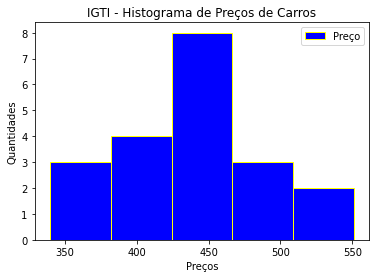

In [14]:
plt.hist(dados['Preco'], bins=5, edgecolor="yellow", color="blue", 
         label = ['Preço'])
plt.title('IGTI - Histograma de Preços de Carros')
plt.legend()
plt.xlabel('Preços')
plt.ylabel('Quantidades')
plt.show() 

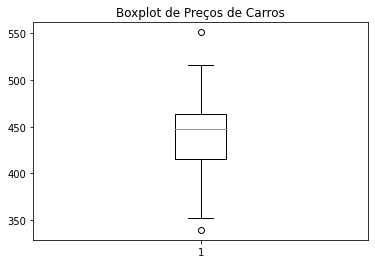

In [15]:
plt.title("Boxplot de Preços de Carros")
plt.boxplot(dados['Preco'])
plt.show()

In [16]:
shapiro(dados['Preco'])

(0.9655886888504028, 0.6603543758392334)

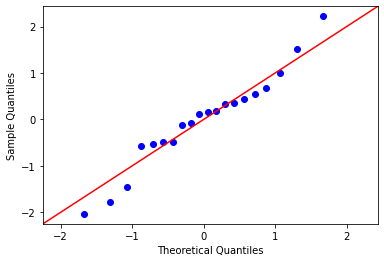

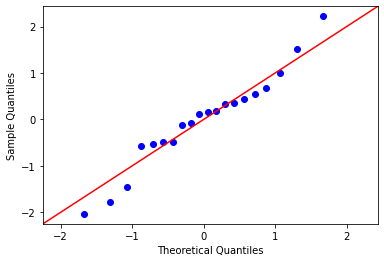

In [28]:
#plotando o gráfico Q-Q plot para visualizar a distribuição
sm.qqplot(df['Preco'], fit=True,line ='45')

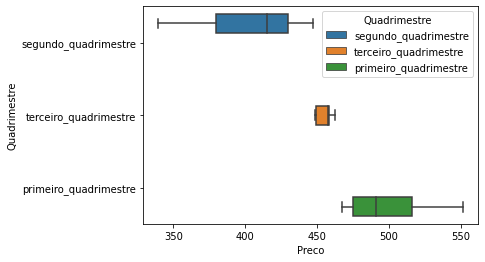

In [19]:
# create grouped boxplot
sns.boxplot(x = df['Preco'],
			y = df['Quadrimestre'],
			hue = df['Quadrimestre'])


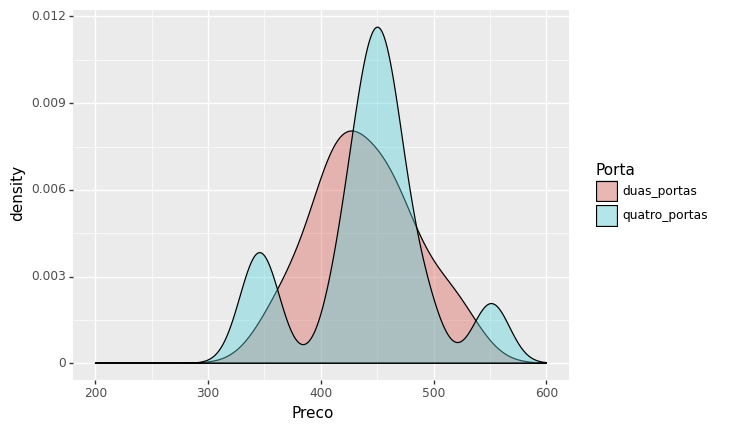

<ggplot: (8752446142485)>

In [20]:
    (ggplot(df)  # qual dataset usar
    + aes(x="Preco", fill = "Porta")  # que variáveis usar
    #+ geom_line()  # Objeto Geométrico a ser desenhado
    + geom_density(alpha = 0.4) 
    + xlim(200,600))

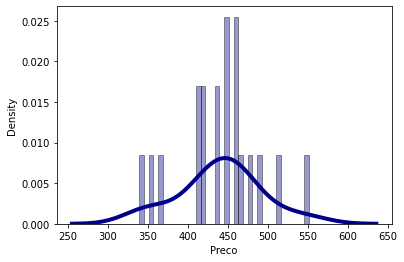

In [21]:
# Density Plot e  Histogram de Precos
sns.distplot(df['Preco'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

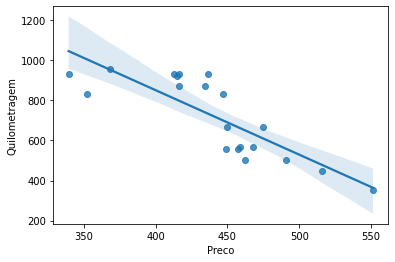

In [22]:
#Explorando a relação entre as variáveis Preço e Quilometragem
sns.regplot(x="Preco", y="Quilometragem", data=df);

In [23]:
corr, _ = pearsonr(df['Preco'], df['Quilometragem'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.823


In [24]:
#Analise descritiva da Variável quilometragem
df['Preco'].describe()

count     20.000000
mean     440.741058
std       51.071729
min      339.548470
25%      415.795130
50%      447.824609
75%      463.494766
max      551.315803
Name: Preco, dtype: float64

In [25]:
#Coeficiente de Variação (Desvio Padrão / Media)
statistics.stdev(df['Quilometragem']) / df['Quilometragem'].mean()

0.2774627864026658